**Nama: Miecel Alicia Angel J.**

**NIM: 2702327601**

# **A - Mid Exam Model Deployment**

## **Case Study - Objectives**

Anda adalah seorang data scientist dari suatu Perusahaan dan diminta untuk membuat dan meng deploy
model machine learning dalam melakukan klasifikasi berdasarkan case sesuai dengan dataset yang Anda
dapatkan dari ketentuan sebelumnya.

**Buatlah model machine learning yang berisi proses pre-processing machine
learning, training, dan hasil dari perbadingan 2 algoritma machine learning yaitu Random Forest dan
Xgboost. Ambil algoritma terbaik dan simpan dengan menggunakan pickle. Seluruh proses disimpan
dengan extension .ipynb**

## **Dataset Description**

**Dataset A - Loan:**

a. person_age = Usia dari orang tersebut.

b. person_gender = Gender dari orang tersebut.

c. person_education = Tingkat pendidikan tertinggi.

d. person_income = Pendapatan tahunan.

e. person_emp_exp = Tahun pengalaman bekerja.

f. person_home_ownership = Status kepemilikan tempat huni.

g. loan_amnt = Jumlah pinjaman yang diminta.

h. loan_intent = Tujuan dari pinjaman.

i. loan_int_rate = Suku bunga pinjaman.

j. loan_percent_income = Jumlah pinjaman sebagai persentase dari pendapatan tahunan.

k. cb_person_cred_hist_length = Durasi kredit dalam tahun.

l. credit_score = Skor kredit dari orang tersebut.

m. previous_loan_defaults_on_file = Indikator tunggakan pinjaman sebelumnya.

n. loan_status (target variable) = Persetujuan pinjaman; 1: diterima dan 0: ditolak

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

##**READ DATASET**

In [ ]:
df = pd.read_csv("Dataset_A_loan.csv")

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


##**EDA & DATA PREPROCESSING**

#### **Check Data Structure**

In [ ]:
df.shape

(45000, 14)

Dataset loan ini memiliki total 45000 rows dan 14 column (features)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


#### **Check Duplicated Data**

In [ ]:
df.duplicated().sum()

np.int64(0)

Tidak ada ada yang duplicated, further preprocessing tidak diperlukan.

#### **Check Missing Value**

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,2250
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Ada 2250 missing values pada column 'person_income', karena bobotnya masih ~10% maka missing values yang ada akan didrop.

In [ ]:
df = df.dropna()

#### **Check Unique Values**

In [ ]:
for i in df.columns:
    print(f"{df[i].value_counts()} \n")

person_age
23.0     5003
24.0     4912
25.0     4266
22.0     4014
26.0     3475
27.0     2930
28.0     2600
29.0     2340
30.0     1930
31.0     1568
32.0     1330
21.0     1209
33.0     1194
34.0      942
35.0      791
36.0      695
37.0      618
38.0      474
39.0      374
40.0      334
41.0      290
42.0      232
43.0      201
44.0      166
45.0      132
47.0      104
46.0      104
48.0       84
49.0       59
50.0       52
51.0       42
52.0       39
53.0       34
54.0       24
55.0       23
56.0       20
58.0       19
57.0       17
20.0       15
60.0       15
61.0       11
65.0       10
66.0       10
64.0        7
70.0        7
62.0        6
59.0        5
69.0        5
73.0        3
63.0        3
123.0       2
144.0       2
78.0        1
94.0        1
80.0        1
84.0        1
76.0        1
67.0        1
116.0       1
109.0       1
Name: count, dtype: int64 

person_gender
male       23568
female     19094
Male          44
fe male       44
Name: count, dtype: int64 

person_educ

#### **Split Numerical & Categorical Features**

In [ ]:
df['loan_status'] = df['loan_status'].astype('category')

numerical_features = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

categorical_features = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file',
    'loan_status'
]

In [ ]:
print("Numerical Features: ", numerical_features)
print("Categorical Features: ", categorical_features)

Numerical Features:  ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
Categorical Features:  ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']


#### **Handling Anomalies**

**Gender** - column 'person_gender' dalam dataset ini berisi nilai yang tidak konsisten atau salah penulisan (fe male, Male)

In [ ]:
df['person_gender'] = df['person_gender'].str.lower().str.strip()

df['person_gender'] = df['person_gender'].replace({
    'fe male': 'female',
    'male': 'male',
    'female': 'female'
})

print(df['person_gender'].value_counts())

person_gender
male      23612
female    19138
Name: count, dtype: int64


**Age** - Pada column 'person_age', terdapat nilai yang tidak realistis, seperti usia yang lebih dari 70 tahun, yang tidak memungkinkan seseorang untuk mengajukan loan.

In [ ]:
df = df[df['person_age'].between(18, 70)]

**EMP_EXP** - Saya melakukan pengecekan apakah ada row yang memiliki value emp_exp lebih besar daripada age.

In [ ]:
df[df['person_emp_exp'] > df['person_age']]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


Tidak ada row yang memiliki value emp_exp lebih besar daripada age mereka, sehingga preprocessing lebih lanjut tidak diperlukan.

#### **Check Distribution**

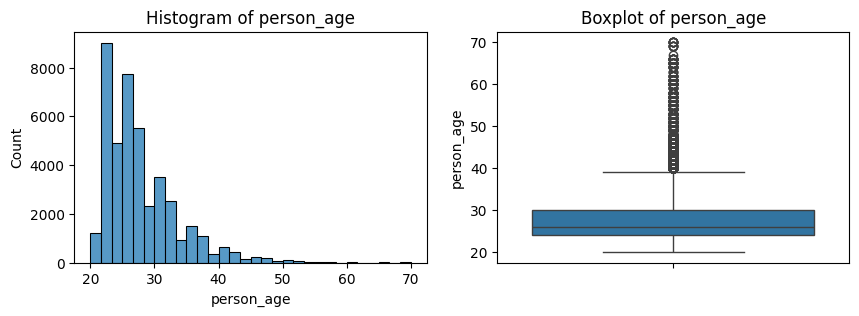

person_age - Skewness: 1.8376776497106901
person_age - Kurtosis: 5.0215822658032305


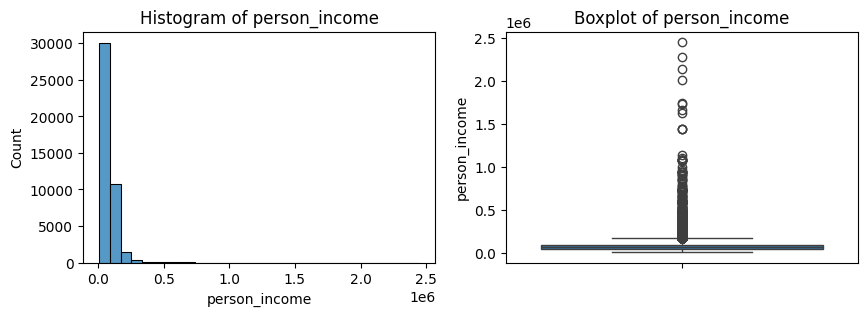

person_income - Skewness: 9.710318438159721
person_income - Kurtosis: 220.0861879181045


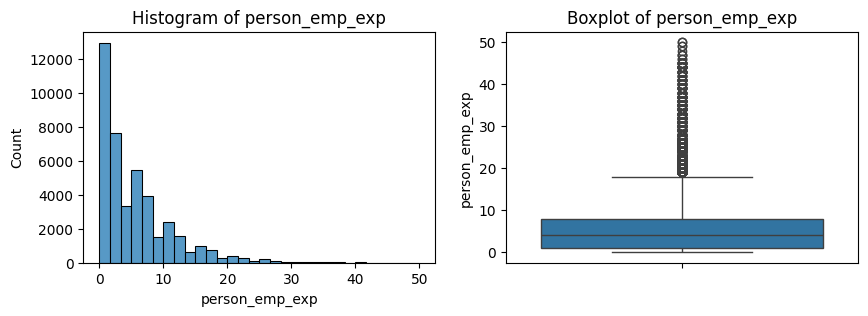

person_emp_exp - Skewness: 1.8743887745439873
person_emp_exp - Kurtosis: 5.185392044415131


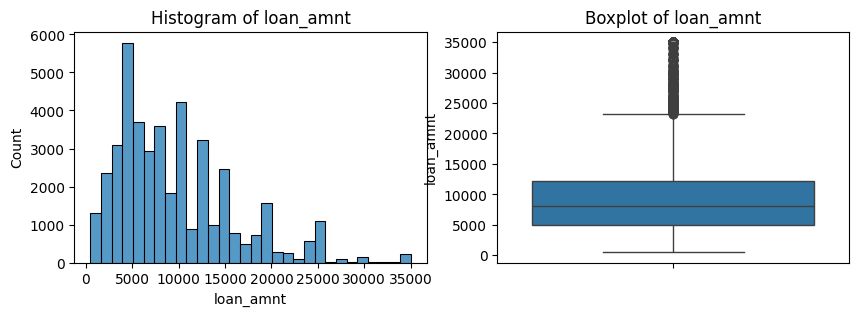

loan_amnt - Skewness: 1.1810569950905392
loan_amnt - Kurtosis: 1.3546221619448358


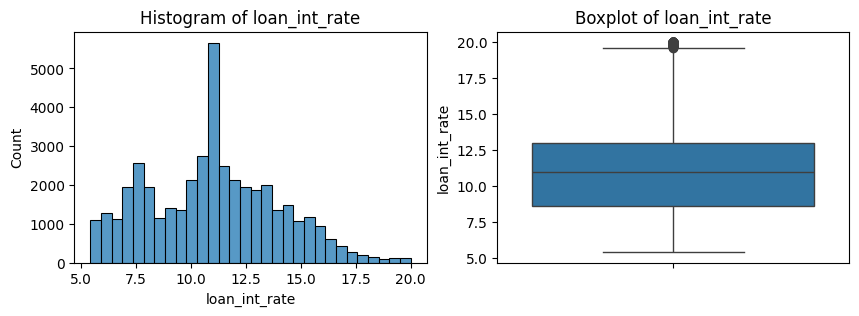

loan_int_rate - Skewness: 0.21377524585512897
loan_int_rate - Kurtosis: -0.4194319081745701


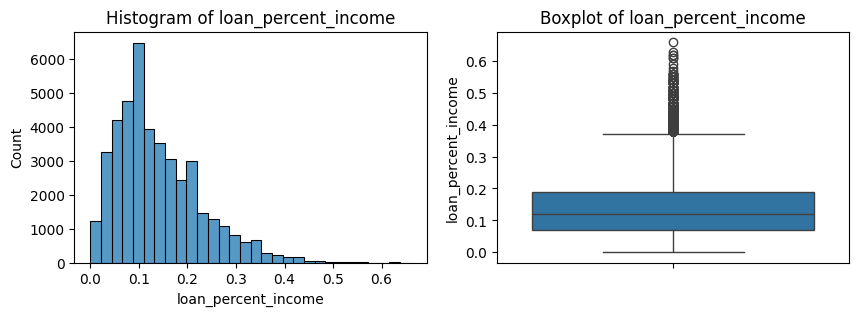

loan_percent_income - Skewness: 1.0342817219229312
loan_percent_income - Kurtosis: 1.097852236949747


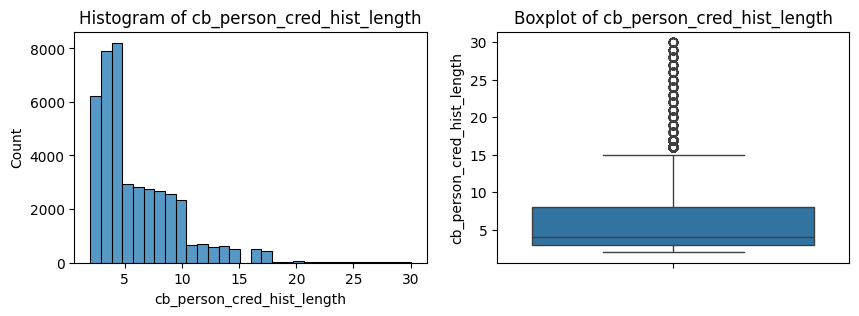

cb_person_cred_hist_length - Skewness: 1.6264270288591476
cb_person_cred_hist_length - Kurtosis: 3.7135092082517756


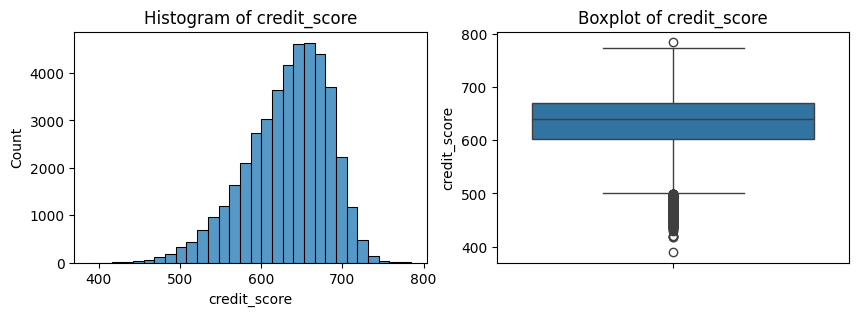

credit_score - Skewness: -0.620632476892606
credit_score - Kurtosis: 0.1987347594861144


In [ ]:
def check_distribution_outliers(dataframe, numerical):
    for col in numerical:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=dataframe[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'{col} - Skewness: {dataframe[col].skew()}')
        print(f'{col} - Kurtosis: {dataframe[col].kurt()}')

check_distribution_outliers(df[numerical_features], numerical_features)

Walaupun ada beberapa outliers yang terlihat dalam plot, ini make sense karena kondisi setiap orang yang mengajukan pinjaman berbeda-beda, jadi ini tidak bisa dianggap as outliers walaupun memang terlihat adanya extreme value.

In [ ]:
for i in numerical_features:
    stat, p_value = shapiro(df[i])
    print(f"{i}:\n Shapiro-Wilk Stat = {stat}, p-value = {p_value}\n")

person_age:
 Shapiro-Wilk Stat = 0.8411640023663416, p-value = 3.257600043435887e-105

person_income:
 Shapiro-Wilk Stat = 0.5781593115237329, p-value = 2.2692161378683817e-132

person_emp_exp:
 Shapiro-Wilk Stat = 0.820260028924466, p-value = 1.779117771261855e-108

loan_amnt:
 Shapiro-Wilk Stat = 0.9070879356975702, p-value = 1.1929450305894405e-91

loan_int_rate:
 Shapiro-Wilk Stat = 0.9832430131701255, p-value = 1.0503519841504263e-54

loan_percent_income:
 Shapiro-Wilk Stat = 0.9302432630738608, p-value = 8.636251335913388e-85

cb_person_cred_hist_length:
 Shapiro-Wilk Stat = 0.8394307568786521, p-value = 1.692492979095977e-105

credit_score:
 Shapiro-Wilk Stat = 0.9748534232569441, p-value = 1.3950156858194385e-62



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 42736.
  res = hypotest_fun_out(*samples, **kwds)


Semua numerical features dalam dataset ini tidak mengikuti distribusi normal (p-value < 0.05). Namun, karena dataset ini digunakan untuk keperluan prediksi loan approval maka normalitas distribusi tidak menjadi syarat penting karena keadaan tiap orang yang mengajukan loan pasti berbeda-beda.

#### **Correlation of Numerical Features with Target Variable**

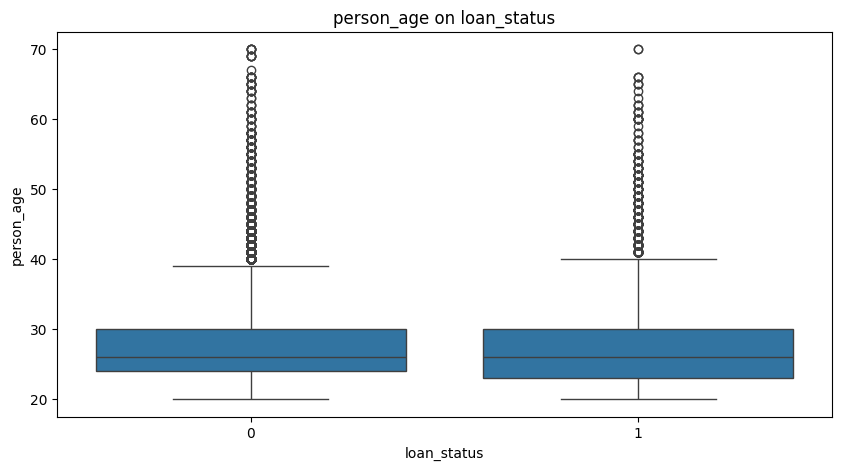

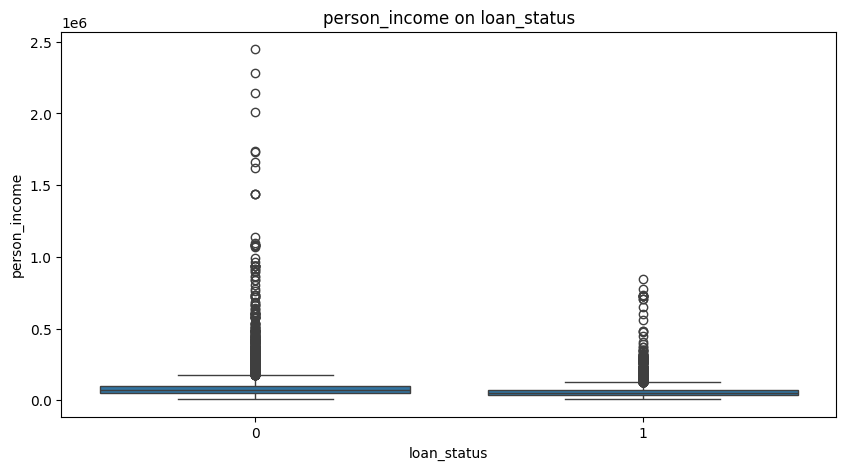

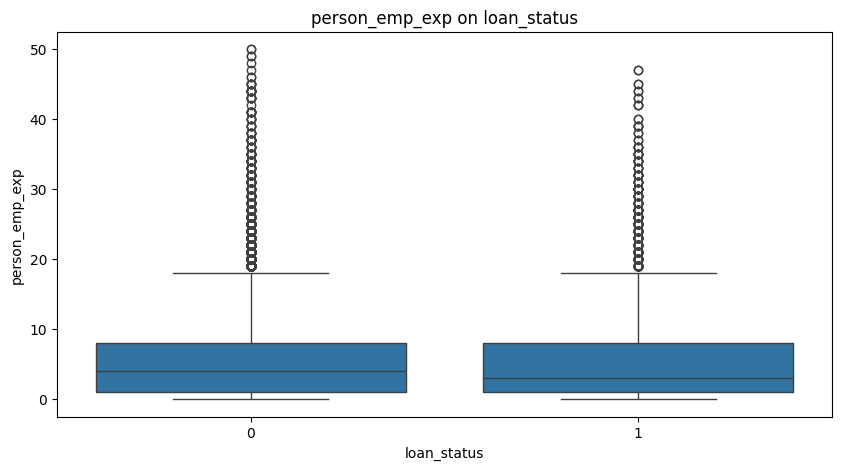

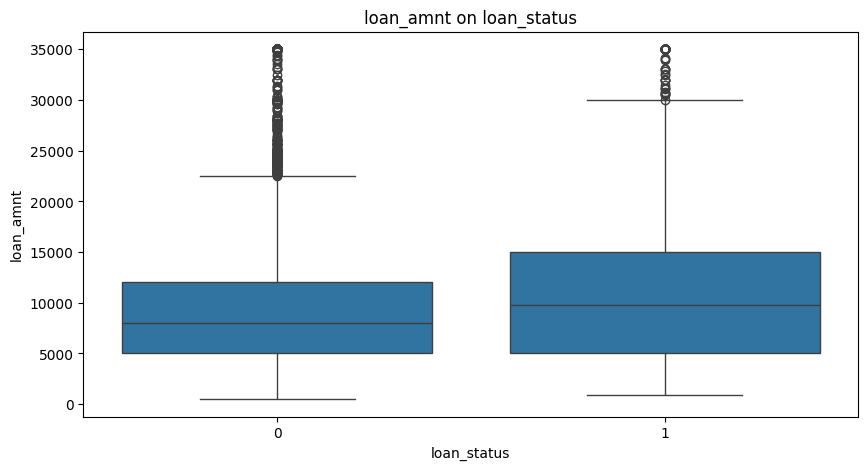

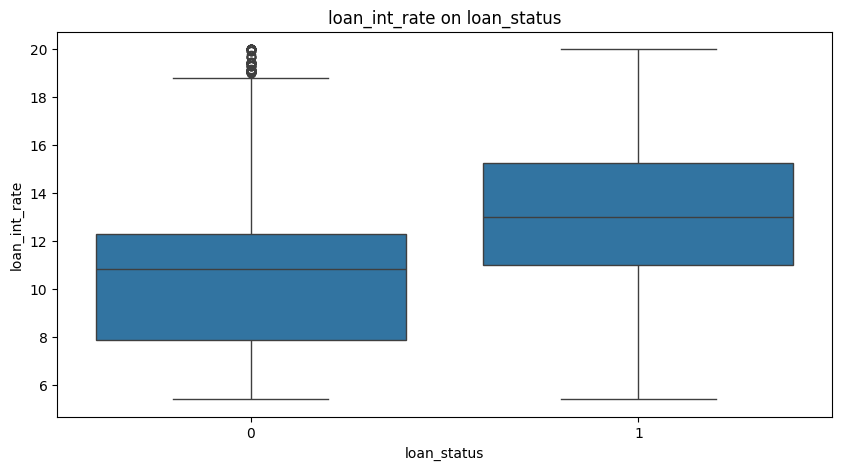

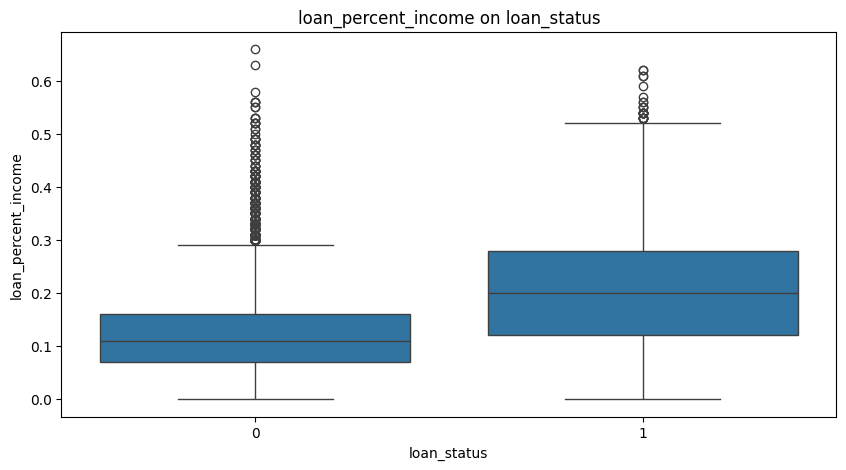

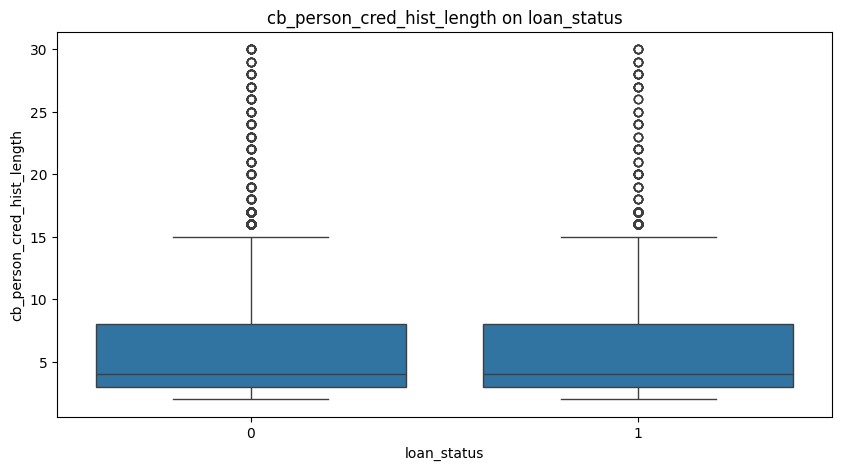

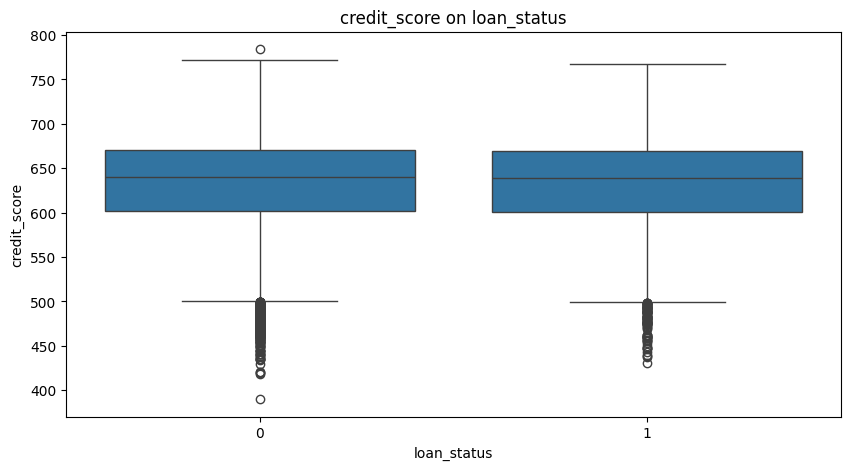

In [ ]:
def check_numcols_with_Y(data, cols, target, target_order):
    for col in cols:
        plt.figure(figsize = (10, 5))

        sns.boxplot(x = data[target],
                    y = data[col],
                    order = target_order)
        plt.title(f"{col} on {target}")

        plt.show()

check_numcols_with_Y(df,
                     numerical_features,
                     'loan_status',
                     target_order=[0,1])

**1. person_age:** Rata-rata umur pemohon di kedua kelas (loan_status 0 & 1) hampir mirip, sekitar usia 25–30 tahun, jadi umur tidak terlalu membedakan antara pinjaman ditolak atau disetujui.  

**2. person_income:** Pemohon dengan status ditolak (0) punya lebih banyak income tinggi & outlier ekstrem, sedangkan yang disetujui (1) income-nya cenderung lebih rendah dan sebaran lebih rapat.

**3. person_emp_exp**: Rata-rata pengalaman kerja mirip antara loan disetujui dan ditolak, jadi pengaruhnya ke approval kelihatan nggak signifikan.

**4. loan_amnt:** Pinjaman yang ditolak (0) cenderung punya permintaan nominal lebih rendah, sedangkan yang disetujui (1) malah sering di-approve untuk jumlah yang lebih besar.

**5. loan_int_rate:** Loan yang disetujui (1) rata-rata punya bunga lebih tinggi dibanding yang ditolak.

**6. loan_percent_income:** Persentase cicilan terhadap income lebih besar di loan_status = 1.

**7. cb_person_cred_hist_length:** Panjang histori kredit cenderung mirip antara dua status, tapi ada cukup banyak outlier.

**8. credit_score:** Credit score lebih stabil di status 1, sedangkan status 0 lebih variatif dan banyak yang rendah


#### **Correlation of Categorical Features with Target Variable**

<Figure size 1000x500 with 0 Axes>

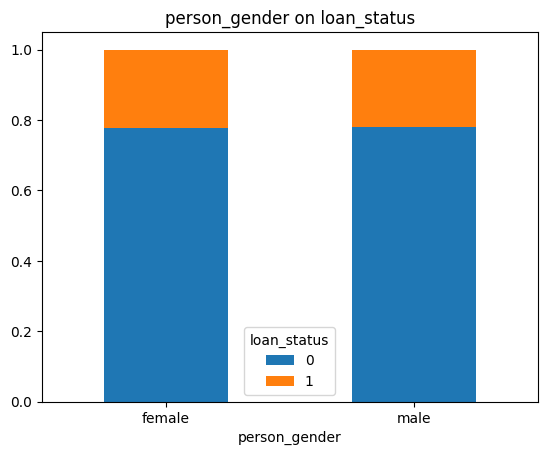

<Figure size 1000x500 with 0 Axes>

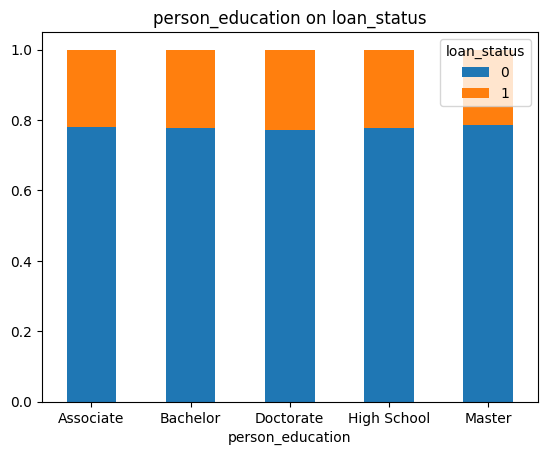

<Figure size 1000x500 with 0 Axes>

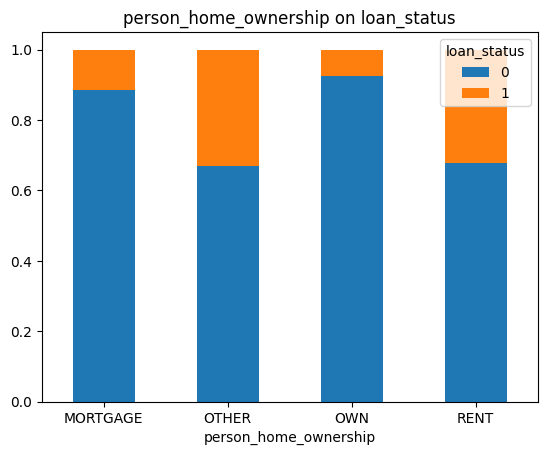

<Figure size 1000x500 with 0 Axes>

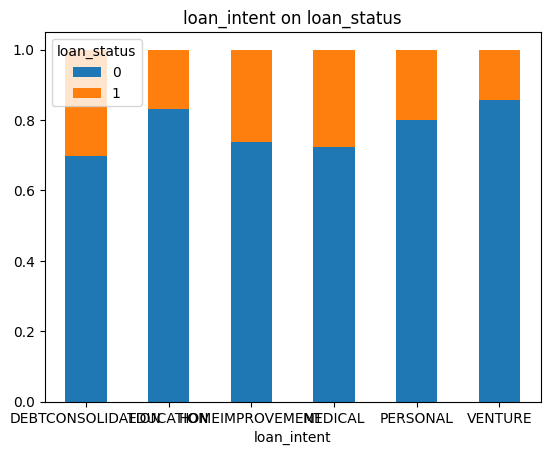

<Figure size 1000x500 with 0 Axes>

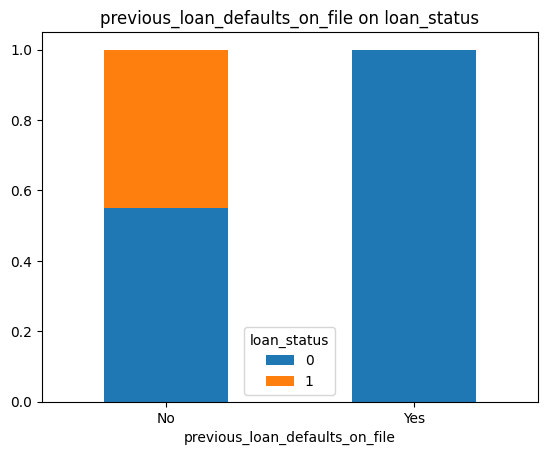

In [ ]:
def check_catcols_with_Y(data, cols, target):
    for col in cols:
        plt.figure(figsize = (10, 5))

        data.groupby(col)[target].\
          value_counts(normalize = True).\
          unstack(target).\
          plot.\
          bar(stacked = True)
        plt.title(f"{col} on {target}")
        plt.xticks(rotation = 0)

        plt.show()

checkcatcols = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

check_catcols_with_Y(df, checkcatcols, 'loan_status')

**1. person_gender:** Gender tidak terlalu berpengaruh terhadap loan approval. Baik pria maupun wanita punya kemungkinan yang mirip untuk disetujui atau ditolak.

**2. person_education:** Tingkat pendidikan tidak terlalu membedakan peluang disetujui atau ditolak.
Tapi ada sedikit indikasi bahwa *Master* mungkin sedikit lebih sering ditolak, mungkin karena faktor lain seperti loan amount/income yang tidak cocok.

**3. person_home_ownership:** Status kepemilikan rumah berpengaruh. Peminjam yang memiliki rumah sendiri atau *mortage* cenderung lebih dipercaya dan punya peluang lebih besar untuk disetujui.

**4. loan_intent:** Tujuan pinjaman mempengaruhi peluang disetujui.
Pinjaman untuk tujuan “pribadi” dan “usaha” mungkin dianggap lebih berisiko oleh pemberi pinjaman.

**5. previous_loan_defaults_on_file:** Dapat disimpulkan feature ini merupakan feature yang sangat penting. Jika seseorang pernah gagal bayar sebelumnya, kemungkinan besar pinjamannya ditolak.

### **Encoding**

In [ ]:
one_hot_cols = ['person_gender', 'person_home_ownership', 'loan_intent']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

education_order = {'High School':1, 'Associate':2, 'Bachelor':3, 'Master':4, 'Doctorate':5}
df['person_education'] = df['person_education'].map(education_order)

df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes':1, 'No':0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42736 entries, 0 to 44999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   person_age                      42736 non-null  float64 
 1   person_education                42736 non-null  int64   
 2   person_income                   42736 non-null  float64 
 3   person_emp_exp                  42736 non-null  int64   
 4   loan_amnt                       42736 non-null  float64 
 5   loan_int_rate                   42736 non-null  float64 
 6   loan_percent_income             42736 non-null  float64 
 7   cb_person_cred_hist_length      42736 non-null  float64 
 8   credit_score                    42736 non-null  int64   
 9   previous_loan_defaults_on_file  42736 non-null  int64   
 10  loan_status                     42736 non-null  category
 11  person_gender_female            42736 non-null  bool    
 12  person_gender_male     

### **Data Splitting**

In [ ]:
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target variable (loan_status)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Data Scaling**

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**MODELING & EVALUATION**

### **Random Forest**

In [ ]:
rf_default = RandomForestClassifier(n_estimators = 10, criterion = 'log_loss')
rf_default.fit(X_train, y_train)


y_pred_default_rf = rf_default.predict(X_test)

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_default_rf))

Random Forest Confusion Matrix:
 [[6454  190]
 [ 536 1368]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      6644
           1       0.88      0.72      0.79      1904

    accuracy                           0.92      8548
   macro avg       0.90      0.84      0.87      8548
weighted avg       0.91      0.92      0.91      8548



**Classification Report:**

*CLASS (0): Not Approved*  

1. Precision: 0.93 → Model sangat jarang salah dalam memprediksi "Not Approved".

2. Recall: 0.97 → Hampir semua kasus "Not Approved" berhasil dikenali.  

3. F1-score: 0.95 → Kinerja model sangat baik dan seimbang untuk class ini.  

4. Support: 6644 → Jumlah data aktual dengan label "Not Approved".  

*CLASS (1): Approved*
1. Precision: 0.88 → Prediksi "Approved" cukup akurat, tapi masih ada false positives.
2. Recall: 0.74 → Sebanyak 26% dari kasus "Approved" tidak berhasil dikenali (termasuk dalam false negatives).
3. F1-score: 0.81 → Kinerja lumayan, namun masih bisa ditingkatkan.
4. Support: 1904 → Jumlah data aktual dengan label "Approved".


#### **Confusion Matrix**

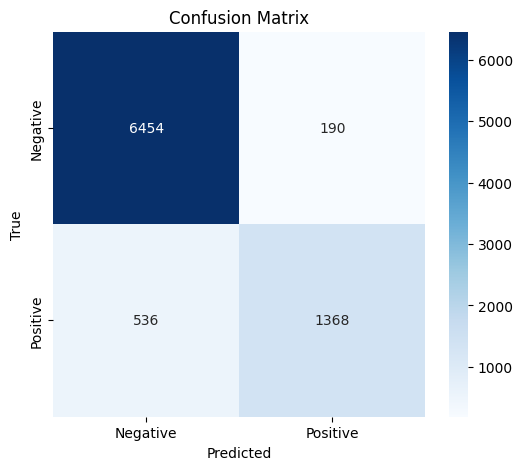

In [ ]:
cm = confusion_matrix(y_test, y_pred_default_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**1. True Negative (TN): 6454**   

Artinya, sebanyak 6454 data yang benar-benar tidak disetujui pinjamannya berhasil diprediksi dengan tepat oleh model.

**2. False Positive (FP): 190**


Sebanyak 190 data yang seharusnya tidak disetujui malah diprediksi akan disetujui oleh model. Ini adalah kesalahan jenis false alarm.

**3. False Negative (FN): 536**

Sebanyak 536 data yang sebenarnya layak disetujui justru diprediksi akan ditolak oleh model. Ini adalah kesalahan yang cukup penting karena bisa menghambat peminjam yang seharusnya lolos.

**4. True Positive (TP): 1368**

Artinya, sebanyak 1368 data yang memang layak disetujui pinjamannya berhasil dikenali dengan benar oleh model.

### **XGBoost**

In [ ]:
xgboost_default = XGBClassifier(eval_metric="logloss",
                                use_label_encoder=False,
                                random_state=42)

xgboost_default.fit(X_train, y_train)
y_pred_default_xgb = xgboost_default.predict(X_test)

print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_default_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Confusion Matrix:
 [[6457  187]
 [ 407 1497]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6644
           1       0.89      0.79      0.83      1904

    accuracy                           0.93      8548
   macro avg       0.91      0.88      0.90      8548
weighted avg       0.93      0.93      0.93      8548



**Classification Report:**

*CLASS (0): Not Approved*

1. Precision: 0.94 → Model sangat jarang salah dalam memprediksi "Not Approved".
2. Recall: 0.97 → Hampir semua kasus "Not Approved" berhasil dikenali.
3. F1-score: 0.96 → Kinerja model sangat baik dan seimbang untuk class ini.
4. Support: 6644 → Jumlah data aktual dengan label "Not Approved".

*CLASS (1): Approved*

1. Precision: 0.89 → Prediksi "Approved" cukup akurat, tapi masih ada false positives.
2. Recall: 0.79 → Sebanyak 21% dari kasus "Approved" tidak berhasil dikenali (termasuk dalam false negatives).
3. F1-score: 0.83 → Kinerja model lumayan, namun masih bisa ditingkatkan.
4. Support: 1904 → Jumlah data aktual dengan label "Approved".

#### **Confusion Matrix**

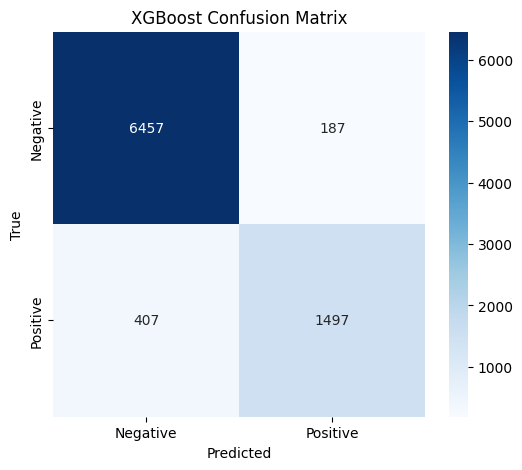

In [ ]:
cm_xgboost = confusion_matrix(y_test, y_pred_default_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**1. True Negative (TN): 6457**

Artinya, sebanyak 6457 data yang benar-benar tidak disetujui pinjamannya berhasil diprediksi dengan tepat oleh model.

**2. False Positive (FP): 187**

Sebanyak 187 data yang seharusnya tidak disetujui malah diprediksi akan disetujui oleh model. Ini adalah kesalahan jenis false alarm.

**3. False Negative (FN): 407**

Sebanyak 407 data yang sebenarnya layak disetujui justru diprediksi akan ditolak oleh model. Ini adalah kesalahan yang cukup penting karena bisa menghambat peminjam yang seharusnya lolos.


**4. True Positive (TP): 1497**
Artinya, sebanyak 1497 data yang memang layak disetujui pinjamannya berhasil dikenali dengan benar oleh model.

## **CONCLUSION**

Setelah membandingkan kedua model, **XGBoost** menunjukkan keunggulan tipis, terutama dalam menangani kelas "Approved" (class 1), dengan skor recall yang lebih baik yaitu 0.79 dibandingkan dengan Random Forest yang hanya 0.72. XGBoost juga memberikan kinerja yang lebih seimbang, terutama dalam hal F1-score di kedua kelas.

**That's why I choose XGBoost untuk di-deploy**, karena model ini menunjukkan performa yang lebih konsisten di kedua kelas, terutama dalam mengenali kasus "Approved" dengan lebih baik (higher recall). Dengan accuracy 93% dan F1-score yang seimbang, XGBoost akan lebih andal untuk diterapkan dalam prediction nanti.